In [ ]:
"""
Lab scenario
You'll assume the role of a Data Analyst at QuickServe Meals, a rapidly growing meal delivery service company. As the company expands, customer service efficiency has become a crucial factor for maintaining customer satisfaction and loyalty. Recent feedback has highlighted issues in response times and query resolution, impacting customer experience negatively. Your task is to analyze the provided conversation logs to identify patterns and areas for improvement. This analysis will directly influence how customer service protocols are redesigned to enhance responsiveness and effectiveness. By understanding customer interactions better, QuickServe aims to implement strategic changes to elevate service quality and ensure customer retention.
Objectives
Apply Generative AI models like Google's FLAN T5 to analyse text and conversation data
Gain proficiency in utilizing pre-trained NLP models from the Transformers library
Gain knowledge about generative AI models, focusing on how they learn from data to generate new content
Acquire the ability to design and develop AI-driven solutions to solve complex problems in various domains such as healthcare, finance, and customer service
Requirement
Python Proficiency
Machine Learning Knowledge
What you'll learn
Generative AI (GenAI)
Natural Language Processing (NLP)
AI Applications
Transformers library
"""

"""Task 1
Clean and Prepare Data
In this task, you will transform and clean up a dataset containing call logs from a company's communication system. The dataset is cluttered with unstructured data in a single column 
that includes date, time, and conversation logs. Your goal is to extract meaningful information from this messy data format and prepare a structured DataFrame that can be easily 
analyzed and processed for further business insights.
https://pandas.pydata.org/ 

"""

# Import the Pandas library to work with the dataset.
# Import Pandas for data manipulation
import pandas as pd

# Load the dataset containing the call logs from a CSV file into a Pandas DataFrame.
# Read the 'Call_Logs.csv' file into a DataFrame
df = pd.read_csv('Call_Logs.csv')
df.head()

# Check the first call log to have a feel for the data.
# Preview one observation from the Logs Column
df.Logs[0]

# Create a function to extract date, time, and conversation details from the raw logs.
# Define a function to extract date, time, and conversation details from the 'Logs' field
def extract_info(df):
    # Split the 'Logs' column content by new lines
    lines = df['Logs'].split('\n')
    
    # Extract date and time details from their respective lines
    date = lines[0].split(': ')[1]
    time = lines[1].split(': ')[1]
    
    # Extract conversation content starting from the fourth line onward
    conv = "\n".join([line for line in lines[3:] if line != ""])
    
    return date, time, conv

# Use the extraction function on each row of the DataFrame to derive the Date, Time, and Conversation columns.
# Apply 'extract_info' function to each row of the DataFrame to get structured columns
df[['Date', 'Time', 'Conversation']] = df.apply(extract_info, axis=1, result_type="expand")
df.head()


# Remove the original 'Logs' column and any irrelevant columns (like 'Unnamed: 0') to clean up the DataFrame.
# Drop the original 'Logs' column and any unnamed indices
df.drop(['Logs', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,Date,Time,Conversation
0,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F..."
1,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ..."
2,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess..."
3,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli..."
4,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact..."


In [2]:
"""Task 2
Automated Conversation Summarization with T5
In this task, you will use the T5 model from Google's FLAN (Fine-tuned Language Net) series to automatically summarize customer service conversations. 
Specifically, you need to use google/flan-t5-base model. The task aims to condense detailed customer interactions into concise summaries, capturing the main points discussed. 
This exercise helps in understanding customer concerns and the essence of each interaction without going through the entire conversation.
https://huggingface.co/google/flan-t5-base 
"""

# Import the necessary classes from the transformers library.
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the tokenizer and model using the T5Tokenizer.from_pretrained and T5ForConditionalGeneration.from_pretrained methods.
# Initialize tokenizer and model from Google's FLAN T5 base variant
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

# Create an empty list to store the summarization outputs.
# List to store the summarization results
output_list = []

# Iterate through each conversation in the dataset, format it into a summarization prompt, tokenize the prompt, generate the summary using the model, and decode the generated tokens back to text.
# Iterate over each conversation in the DataFrame's 'Conversation' column
for conv in df['Conversation']:
    # Prepare the prompt for summarization
    prompt = f"""
    {conv}
    
    What were the main points in that conversation?
    """
    
    # Tokenize the prompt and generate the summary
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    output_ids = model.generate(input_ids)
    summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
    # Append the summary to the output list
    output_list.append(summary)
    
# Add the generated summaries as a new column in your DataFrame.
# Add summaries as a new column in the DataFrame
df['Summary'] = output_list
df.head()

# Print each summary to review the results.
# Print each summary to the console
for summary in df['Summary']:
    print(summary)

/home/labsuser/.local/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/home/labsuser/.local/lib/python3.8/site-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


Client received a meal kit yesterday, but one of the ingredients was missing.
Client is missing the recipe card for the shrimp linguine with garlic butter sauce.
Client is canceling his meal kit subscription.
Client received his meal kit today, but there appears to be a damaged item.
Client received a meal kit yesterday, but the chicken in it was expired. The chicken in
Client is unhappy with the food kits.
Client hasn't received his meal kit delivery yet, and it's already two days
Client is frustrated with the lack of a recipe booklet.
Client is calling Fresh Fare Meal Kits customer service to cancel her subscription.
Client needs to cancel his subscription to Fresh Fare Meal Kits.
Client is changing her meal plan with Fresh Fare Meal Kits.
Client is looking for a custom meal kit for a larger party.
Client wants to add a breakfast option to her current meal plan.
Client received a delivery yesterday, but the package was missing the fresh basil needed for the pasta
Client has a severe 

In [3]:
""" Task 3
Detecting Cancellation Requests in Multilingual Customer Conversations
This task involves using a zero-shot classification model to identify cancellation requests within customer conversations. The model used is MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli, which is capable of understanding multiple languages. This is particularly useful for businesses operating in a multilingual environment. You will classify each conversation into one of two categories: 'cancellation' or 'other'. The goal is to flag conversations that explicitly mention cancellation, which can then be prioritized for further action or review by customer service teams.
https://huggingface.co/MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli 
""" 
# Load the zero-shot classification pipeline from the transformers library, which will be used to classify the conversations.
from transformers import pipeline

# Initialize the zero-shot classification pipeline with the specified multilingual model
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli")

# Set the labels that will be used to classify the conversations. In this case, the focus is on detecting cancellation requests.
# Define labels to classify the conversations into cancellation or other
labels = ['cancellation', 'other']
# List to store the classification results
classification = []

# Iterate through each conversation stored in the DataFrame, classify them using the zero-shot classifier, and store the results in a list.
# Iterate over each conversation in the DataFrame's 'Conversation' column
for conv in df['Conversation']:
    # Classify the conversation and retrieve the primary label
    result = classifier(conv, labels)
    classification.append(result['labels'][0])
    
# Convert the classification results into a binary format where 'cancellation' results in True and all others in False. Add this as a new column in your DataFrame.
# Create a new column in the DataFrame to indicate whether the conversation is about cancellation
df["Cancellation"] = [True if cls == 'cancellation' else False for cls in classification]

# Display the DataFrame to review the newly added 'Cancellation' column along with other existing data.
# Display the DataFrame to inspect the new 'Cancellation' column and other data
df.head()

2024-12-16 10:17:28.300542: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 10:17:28.886794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-16 10:17:31.104904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/labsuser/.local/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/428M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

,Date,Time,Conversation,Summary,Cancellation
0,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F...","Client received a meal kit yesterday, but one ...",False
1,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ...",Client is missing the recipe card for the shri...,False
2,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess...",Client is canceling his meal kit subscription.,True
3,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli...","Client received his meal kit today, but there ...",False
4,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact...","Client received a meal kit yesterday, but the ...",False


In [4]:
""" Task 4
Identifying Reasons Behind Subscription Cancellations
This task leverages a machine learning model to extract detailed reasons for subscription cancellations directly from customer conversations. The goal is to analyze conversations that have been flagged as involving a cancellation and utilize the T5 model to generate insights into why customers are choosing to cancel their subscriptions. This can help our business understand underlying issues and improve services to reduce churn.
https://arxiv.org/pdf/2210.11416
""" 
# Create a function that checks if a conversation is flagged as a cancellation and then uses the T5 model to extract reasons for the cancellation.
def cancellation_reasons(df):
    # Check if the conversation is flagged as a cancellation
    if df['Cancellation'] == False:
        return 'None'
    else:
        # Prepare the model prompt with the specific question about cancellation reasons
        prompt = f"""
        {df['Conversation']}

        What are the issues that led the client to cancel their subscription?
        """

        # Convert the prompt into tokens, feed it into the model, and generate the output
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids
        output_ids = model.generate(input_ids, max_new_tokens=50, min_length=20)
        return tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
# Use the apply method to execute the cancellation_reasons function on each row of the DataFrame, which involves interaction with the T5 model.
# Apply the cancellation_reasons function to each row in the DataFrame to extract reasons
df['Cancellation_reasons'] = df.apply(cancellation_reasons, axis=1)
df

# Display or print the reasons for cancellations extracted by the model for review and further analysis.
# Print non-'None' cancellation reasons to review what issues are leading to cancellations
for reason in df['Cancellation_reasons']:
    if reason != "None":
        print(reason)

The client's last three deliveries have been late, some ingredients have been missing, and the quality of the produce has been subpar.
The ingredients are rotten, and the recipes are tasteless. The client is unhappy with the service.
Late deliveries, missing items, and awful quality of the ingredients. The client is fed up with it all.
The client has some unexpected personal issues. They need to cut back on expenses. They have a financial reason for canceling their subscription.
The constant delays, poor quality ingredients, and lack of responsiveness from your customer service team have made it impossible for me to continue using your service.


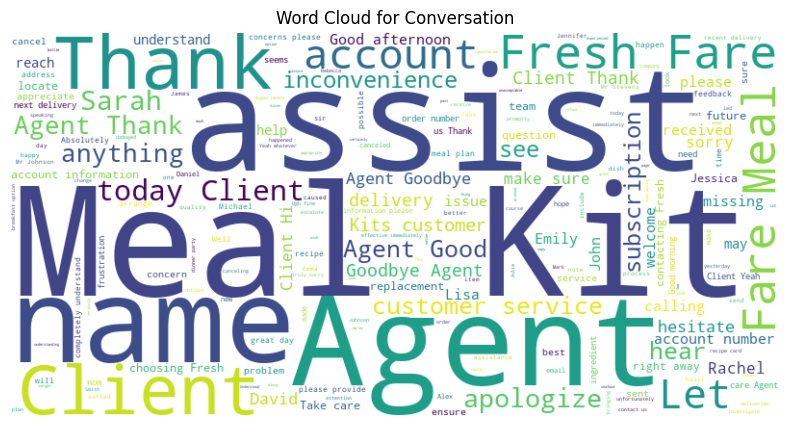

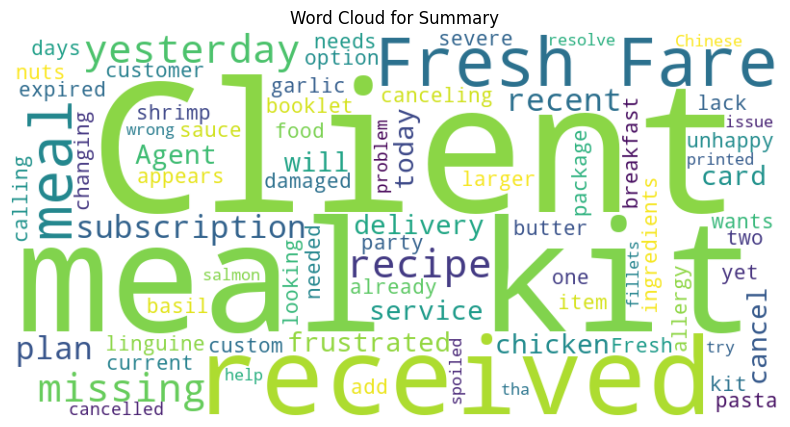

In [5]:
""" Task 5
Visualizing Key Terms in Customer Conversations and Summaries Using Word Clouds
This task focuses on generating word clouds to visually represent the most frequently occurring words in customer conversations and their respective summaries. Word clouds offer a visual insight into the common themes and issues discussed, which can be particularly useful for understanding customer concerns and the focus of customer service interactions.
https://www.geeksforgeeks.org/generating-word-cloud-python/
""" 

# Import matplotlib for plotting and WordCloud for generating word clouds.
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a function to generate a word cloud from a series of text data. This function will take a pandas Series containing text data and a title for the word cloud.
def generate_wordcloud(text_series, title):
    # Concatenate all text data into a single string
    text = " ".join(review for review in text_series)
    
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Set up the plot parameters
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axis as they are unnecessary for a word cloud
    plt.title(title)
    plt.show()
    
# Use the generate_wordcloud function to create and display word clouds for both the 'Conversation' and 'Summary' columns of your DataFrame.
# Generate a word cloud for the 'Conversation' column
generate_wordcloud(df['Conversation'], "Word Cloud for Conversation")

# Generate a word cloud for the 'Summary' column
generate_wordcloud(df['Summary'], "Word Cloud for Summary")

In [ ]:
"""
Your project assignment
YM
Your Manager
Dec 16, 4:30 PM
Hi Satish Kumar! Thanks for working on this project for our team.
Hello, and welcome to the analytics team at QuickServe Meals. As you know, our customer base has grown significantly, and with it, the challenge of maintaining excellent customer service. We’ve collected detailed logs from our customer service interactions over the last quarter, and we need your sharp analytical skills to help us understand where we can improve. This project involves mining these logs to uncover insights that will drive our next big move in customer service enhancements.

Your primary task is to conduct a thorough analysis of these conversation logs using GenAI, and pre-trained models. The insights you generate from this analysis will be crucial in our strategy meeting next week where we will decide on specific changes to our customer interaction protocols. You will find the conversation logs file already available in the workspace. Remember, your insights could greatly influence how we interact with thousands of customers daily, so thoroughness is key. Good luck, and I look forward to seeing your innovative approaches to our challenges.
"""

